# **Computer Infrastructure - Problems**

### Authored by: Stephen Kerr
---

### **Introduction:**

This notebook contains my submission for the my module assessent for ***Computer Infrastructure***.  
It address all four required problems: 
1. Downloading stock market data using the Python package `yfinance`,
2. Plotting **FAANG** (Facebook, Apple, Amazon, Netflix, Goggle) stock market data,
3. Creating an executable Python script (`faang.py`) to automate data collection and plotting, 
4. Configuring GitHub Actions to run the script weekly on a scheule.


#### **yfinance**
The assessment is built around the `yfinance` Python Package (see it's documentation [here](https://ranaroussi.github.io/yfinance/)).  
The Python Package fetches finanical & market data from [Yahoo! Finance](https://finance.yahoo.com/), `yfinance` is an open-source tool that uses Yahoo's publicaly available APIs, it is not affiliated with Yahoo, and it was created with the intended use is in research and education.  
Also see yFinance's Github documentation - https://ranaroussi.github.io/yfinance/

### Imports 

In [1]:
# Imports
import yfinance as yf # importing yfinance to access stock data

import datetime # importing datetime to access dates & times

import os # importing os to handle file paths

import matplotlib.pyplot as plt # importing matplotlib to plot data

import pandas as pd # importing pandas to handle dataframes

import matplotlib.dates as mdates # importing matplotlib.dates to handle date formatting in plots

----
## Problem 1: Data from yfinance

The first task is to implement a function called `get_data()` that: 
- Dowloads hourly historical data for the previous five days
- For the **FAANG** stocks: Facebook (META), Apple (AAPL), Amazon (AMZN), Netflix (NFLX), Google (GOOG)
- Saves the results in a folder called `data` using a timestamped filename (Format: `YYYYMMDD-HHmmss.csv`)

The function used the `yfinance.download()`, which returns a Pandas Dataframe with a multi-inex column strucutre (e.g., "Close", "AAPL").


### Code for `get_data()`:


In [8]:
# Problem 1 Get data function
# See the yf.download function documentation here - (https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html)
# used w3b schools page on datetime formatting - (https://www.w3schools.com/python/python_datetime.asp)
# os.path documentation - (https://docs.python.org/3/library/os.path.html#module-os.path)

def get_data(tickers=None, period='5d', interval='1h', save_dir='data'):
    '''
    Download data from yfinance and saves it to a csv file.
    Defaults to FAANG stocks if tickers is not passed.
    Filename Format: 'YYYYMMDD-HHmmss.csv'
    Returns the filepath and dataframe.
    '''
    
    if tickers is None:
        tickers = ['META','AAPL','AMZN','NFLX','GOOG']  # default to FAANG stocks
    
    # download the data
    df = yf.download(tickers=tickers, period=period, interval=interval, auto_adjust=True)

    # save the dataframe to a csv file titled 'YYYYMMDD-HHmmss.csv'
    # in a data folder (note name of file should be the creation date and time)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    filename = datetime.datetime.now().strftime('%Y%m%d-%H%M%S') + '.csv'
    filepath = os.path.join(save_dir, filename)
    df.to_csv(filepath) # save to csv
    
    return filepath, df 

#### **Example Usage `get_data()`**
Below is an example of using the `get_data()` function coded above. In the example usage the FAANG c are passed to the function and the data is saved to the `data` directory as a .csv file.   

Note in the next code cell the same due to the deafult configuration being the same as what is passed to `get_data()` the same data is fetch and saved. 

In [3]:
# FAANG using the function
filepath, faang = get_data(['META','AAPL','AMZN','NFLX', 'GOOG']) 
print(f'See file at: {filepath}')
print(faang.head(3))

/tmp/ipykernel_4378/503242522.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=tickers, period=period, interval=interval)
[*********************100%***********************]  5 of 5 completed

See file at: data/20251207-102703.csv
Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-01 14:30:00+00:00  278.142090  232.880005  317.010010  639.494995   
2025-12-01 15:30:00+00:00  277.920013  233.970001  316.815002  642.734985   
2025-12-01 16:30:00+00:00  279.770508  234.365005  317.825012  643.510010   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-01 14:30:00+00:00  107.910004  278.769989  235.796997  319.630005   
2025-12-01 15:30:00+00:00  108.380096  278.480103  234.361404  318.630005   
2025-12-01 16:30:00+00:00  108.559998  279.890015  234.470001  318.329987   

Price                               

In [9]:
# Default using the function
data_filepath, default_get_data = get_data()

# Note have to specific that I want the dataframe from the returned tuple 
# as the get_data() function returns (filepath, dataframe)
default_get_data.head(3)

[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-01 14:30:00+00:00  278.142090  232.880005  317.010010  639.494995   
2025-12-01 15:30:00+00:00  277.920013  233.970001  316.815002  642.734985   
2025-12-01 16:30:00+00:00  279.770508  234.365005  317.825012  643.510010   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-12-01 14:30:00+00:00  107.910004  278.769989  235.796997  319.630005   
2025-12-01 15:30:00+00:00  108.380096  278.480103  234.361404  318.630005   
2025-12-01 16:30:00+00:00  108.559998  279.890015  234.470001  318.329987   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-12-01 14:30:00+00:00  645.294983  108.430000  ...  278.149994   
2025-12-01 15:30:00+00:00  642.769470  108.739998  ...  278.100006   
2025-12-01 16:30:00+00:00  644.859985  108.805000  ...  277.899994   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-12-01 14:30:00+00:00  233.214996  317.269989  639.544983  106.500000   
2025-12-01 15:30:00+00:00  232.869995  316.980011  639.440002  107.904999   
2025-12-01 16:30:00+00:00  233.970001  316.904999  642.780029  108.400002   

Price                       Volume                                      
Ticker                        AAPL     AMZN     GOOG     META     NFLX  
Datetime                                                                
2025-12-01 14:30:00+00:00  5114373  7486323  5378317  2268278  3141668  
2025-12-01 15:30:00+00:00  1731132  3030989  1936805  1215559  1918590  
2025-12-01 16:30:00+00:00  2091919  2172750  1200955   522420  1236410  

[3 rows x 25 columns]

In [10]:
default_get_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2025-12-01 14:30:00+00:00 to 2025-12-05 20:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   35 non-null     float64
 1   (Close, AMZN)   35 non-null     float64
 2   (Close, GOOG)   35 non-null     float64
 3   (Close, META)   35 non-null     float64
 4   (Close, NFLX)   35 non-null     float64
 5   (High, AAPL)    35 non-null     float64
 6   (High, AMZN)    35 non-null     float64
 7   (High, GOOG)    35 non-null     float64
 8   (High, META)    35 non-null     float64
 9   (High, NFLX)    35 non-null     float64
 10  (Low, AAPL)     35 non-null     float64
 11  (Low, AMZN)     35 non-null     float64
 12  (Low, GOOG)     35 non-null     float64
 13  (Low, META)     35 non-null     float64
 14  (Low, NFLX)     35 non-null     float64
 15  (Open, AAPL)    35 non-null     float64
 16  (Open, AMZN)    35 non-null     

----
## Problem 2: Plotting Data

### **Brief:** 
>Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.  
>The plot should include axis labels, a legend, and the date as a title.  
>The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.  
>Create the `plots` folder if you don't already have one.  


### Explaining my code for `plot_data()`: 


In [6]:
# function plotdata(): plots the Close prices of the stocks in the dataframe
# pasing the filepath to read the csv file back in

def plot_data():
    '''
    Opens the latest data file in the data folder.
    Plots the Close prices of the stocks in the dataframe and saves the plot to a plots folder.
    '''

    # get the latest file in the data folder
    data_dir = 'data'
    files = os.listdir(data_dir) # list all files in the data folder
    files = [f for f in files if f.endswith('.csv')] # only the csv files
             
    if not files:
        raise FileNotFoundError('No data files found in the data folder.')
    
    # get the latest file based on the filename format 'YYYYMMDD-HHmmss.csv'
    latest_file = max(files)

    # construct the full filepath
    filepath = os.path.join(data_dir, latest_file)



    df = pd.read_csv(filepath, header=[0,1], index_col=0, parse_dates=True)
    
    # plot the Close prices
    close_df = df['Close']

    fig, ax = plt.subplots(figsize=(12, 6))


    close_df.plot(ax=ax, linewidth=2)
    
    ax.set_title(f'Close Prices of Stocks {close_df.index.min().strftime('%Y-%m-%d')
                 } to {close_df.index.max().strftime('%Y-%m-%d')}',
              fontsize=16, fontweight='bold', pad=15) 

    ax.set_xlabel('Date', fontsize=14, fontweight='bold')
    ax.set_ylabel('Close Price ($ - USD)', fontsize=14, fontweight='bold')
    
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

    # formating x-axis for better readability using mdates
    ax.xaxis.set_major_locator(mdates.DayLocator())  # Show every 1 day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # "Month Day"

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()


    ax.legend(title='Stocks', loc='best', frameon=True, shadow=True, fontsize=10)

    # save the plot to a plots folder
    plots_dir = 'plots'
    if not os.path.exists(plots_dir):
        os.makedirs(plots_dir)
    plot_filename = datetime.datetime.now().strftime('%Y%m%d-%H%M%S') + '.png'
    plot_filepath = os.path.join(plots_dir, plot_filename)
    plt.savefig(plot_filepath, dpi=300, bbox_inches='tight')
    plt.show()

    return plot_filepath

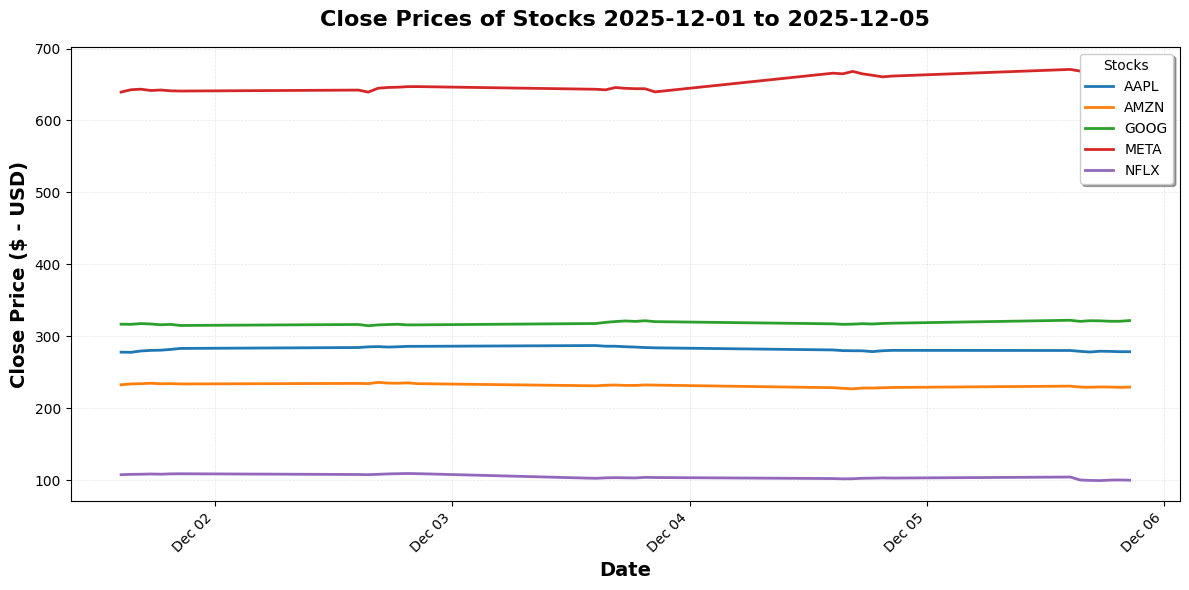

'plots/20251207-102704.png'

In [7]:
# run the plot function
plot_data()

----
## Problem 3: Script

### **Brief:** 
>Create a Python script called `faang.py` in the root of your repository.  
>Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.  
>Note that this will require a shebang line and the script to be marked executable.  
>Explain the steps you took in your notebook.  


## My Scripting Explaintion: faang.py

### Steps took to create the faang.py
1. Copied the Python Libraries required from the start of this notebook.
    - Specifically, yfinance, datatime, os, matplotlib.pyplot, pandas.
2. Copied the `get_data()` function from this notebook. 
    - Note, didn't make any edits to the function.
3. Copied the `plot_data()` function from this notebook.
    - Note, commeted out the `plt.show()` as this will be run as a script.
4. For testing added in 'if __name__ == '__main__' example usage.
5. Added the shebang line to the top of the file
    - **'#! /usr/bin/env python'**
6. Tried to run the script using **'./faang.py'** in the terminal but got an error: 
    - 'bash: ./faang.py: Permission denied'
    - See current permissions (-rw-rw-rw-  1 codespace codespace  2492 Nov  9 19:13 faang.py)
7. Therefore, I changed the permissions on the **'faang.py'** to allow the file to be executed using the following: 
    - chmod u+x faang.py
    - This updated the permissions to (-rwxrw-rw-  1 codespace codespace  2492 Nov  9 19:13 faang.py)
8. Finally, I ran the **'./faang.py'** again, and it was executed successfully.

----
## Problem 4: Automation

### **Brief:** 
>Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.  
>The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.  
>In your notebook, explain each of the individual lines in your workflow.  


## My GitHub Action Workflow Explaination: faang.yml

Below is my **faang.yml** file that can be found in the **.github/worflows** folder in this repository. I created this YAML code following the GitHub Action documenation found [here](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax). 

I will explain each line of code below as an overview it took me 6 failed attempts to manually trigger the workflow before finally on the 7th attempt it worked as expected. Things i have to troubleshoot included an error for trying to import the os python package in my requirements.txt causing an error as it is part of the default pacakges with python. Also, fixing a simple typo in an f-string causing an error. 

As of today 30/11/25 it has successfully run automatically 2 weeks in a row at 8am on Saturday. To see history of ***FAANG Stock Data Collection*** see the log [here](https://github.com/skerr17/computer-infrastructure-assessment/actions).  

---

```yaml
name: FAANG Stock Data Collection

on:
  schedule:
    - cron: '0 8 * * 6'
  workflow_dispatch:

jobs:
  fetch-and-plot:
    runs-on: ubuntu-latest
    
    steps:
    - name: Checkout repository
      uses: actions/checkout@v4
      
    - name: Set up Python
      uses: actions/setup-python@v5
      with:
        python-version: '3.11'
        
    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
        
    - name: Run FAANG stock script
      run:  ./faang.py
        
    - name: Commit and push changes
      run: |
        git config --local user.email "github-actions[bot]@users.noreply.github.com"
        git config --local user.name "github-actions[bot]"
        git add data/ plots/
        git diff --quiet && git diff --staged --quiet || git commit -m "Automated FAANG data update - $(date +'%Y-%m-%d')"
        git push
```
---

### Line by Line Explaination of the faang.yml


#### Code (Name):
```yaml
name: FAANG Stock Data Collection
```
#### Explaination: 
```yaml
name: 
``` 
> Defines the display name of the workflow in the logs 'Actions' tab. I would default to the relative file path in the repository but I felt it better to assign it a name that was more descriptive : FAANG Stock Data Collection. See the specific part of the documentation on the above [here](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#name).
---

#### Code (Schedule):
```yaml
on:
  schedule:
    - cron: '0 8 * * 6'
  workflow_dispatch:
```
#### Explaination: 
```yaml
on: 
``` 
> Is used to define what triggers the worflow to run, this can be an event or set time. See the specific part of the documentation on the above [here](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#on).

```yaml
  schedule:
    - cron: '0 8 * * 6' 
``` 
> This code is used to define the time the workflow will be triggered, using the **POSIX cron syntax** (more detail [here](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#onschedule). There are 5 fields each representing a unit of UTC time that you can define to specify a time. They go minute, hour, day of the month, month, day of the week. If you want to not define a field the * is used. The cron above that we defined is for the workflow to trigger everytime it is the 8th hour (8am) on the 6th day of the week (Saturday). 
---

#### Code (Jobs & Steps - Tasks):
```yaml
jobs:
  fetch-and-plot:
    runs-on: ubuntu-latest
    
    steps:
    - name: Checkout repository
      uses: actions/checkout@v4
      
    - name: Set up Python
      uses: actions/setup-python@v5
      with:
        python-version: '3.11'
        
    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install -r requirements.txt
        
    - name: Run FAANG stock script
      run:  ./faang.py
        
    - name: Commit and push changes
      run: |
        git config --local user.email "github-actions[bot]@users.noreply.github.com"
        git config --local user.name "github-actions[bot]"
        git add data/ plots/
        git diff --quiet && git diff --staged --quiet || git commit -m "Automated FAANG data update - $(date +'%Y-%m-%d')"
        git push
```
#### Explaination: 
```yaml
jobs:
  fetch-and-plot:
    runs-on: ubuntu-latest 
``` 
> A `job` contains a sequence of tasks or actions that are called `steps`. The steps can run commands, setup, or actions in the repository. In the above snippet we create the `job` that all our task will be performed in, then we give the job a meaningful name `fetch-and-plot`, and finally define the system it will execute the tasks on `runs-on: ubuntu-latest`. **Ubuntu** is an open-source, very simple ultrafast operating system. See [here](https://www.geeksforgeeks.org/linux-unix/what-is-ubuntu/). So now we have the `job` name and operating system defined we now need to define the task or `steps` we want to preform.

```yaml
    steps:
    - name: Checkout repository
      uses: actions/checkout@v4 
``` 
> . 

```yaml
    - name: Set up Python
      uses: actions/setup-python@v5
      with:
        python-version: '3.11'
``` 
> . 

```yaml
    - name: Run FAANG stock script
      run:  ./faang.py
``` 
> . 

```yaml
    - name: Commit and push changes
      run: |
        git config --local user.email "github-actions[bot]@users.noreply.github.com"
        git config --local user.name "github-actions[bot]"
        git add data/ plots/
        git diff --quiet && git diff --staged --quiet || git commit -m "Automated FAANG data update - $(date +'%Y-%m-%d')"
        git push
``` 
> . 
---





## **End**